In [11]:
import cv2
import numpy as np
import pandas as pd
from utils import rgb2binary
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from PIL import Image, ImageDraw
import os
import re
import glob
import sys
from  pathlib import Path
from collections import deque
from models.rrt import RRT, RRTStar

In [12]:
dataset_path = '../dataset/sagan_results/gt/results/'
data_path = '../' 

In [13]:
roi_result_list = glob.glob(dataset_path + './*.png')
roi_result_list.sort(key = lambda s: int(re.search('\d+', s).group()))
roi_result_list[:5] 

['../dataset/sagan_results/gt/results/.\\roi_0.png',
 '../dataset/sagan_results/gt/results/.\\roi_1.png',
 '../dataset/sagan_results/gt/results/.\\roi_2.png',
 '../dataset/sagan_results/gt/results/.\\roi_3.png',
 '../dataset/sagan_results/gt/results/.\\roi_4.png']

In [14]:
data = pd.read_csv(dataset_path + './results.csv')
data = data.sort_values(by="true_roi").reset_index(drop=True)
data.head()

,true_roi,pred_roi,iou,fid,is,dice
0,dataset/tasks/map_99/task_90_roi.png,results/roi_0.png,0.627762,100.345329,1.019218,0.771319
1,dataset/tasks/map_99/task_91_roi.png,results/roi_1.png,0.627762,100.345329,1.019218,0.771319
2,dataset/tasks/map_99/task_92_roi.png,results/roi_2.png,0.627762,100.345329,1.019218,0.771319
3,dataset/tasks/map_99/task_93_roi.png,results/roi_3.png,0.627762,100.345329,1.019218,0.771319
4,dataset/tasks/map_99/task_94_roi.png,results/roi_4.png,0.627762,100.345329,1.019218,0.771319


In [15]:
data.true_roi[8]

'dataset/tasks/map_99/task_98_roi.png'

In [16]:
map_file = os.path.dirname(data.true_roi[8])
map_file

'dataset/tasks/map_99'

In [17]:
Tasks = pd.read_csv(data_path + map_file + '.csv')
Tasks.head()

,istart,jstart,igoal,jgoal,euclid
0,52,62,43,10,52.773099
1,5,16,22,44,32.756679
2,25,50,58,31,38.078866
3,55,28,38,59,35.355339
4,58,14,26,56,52.801515


In [18]:
task_num = int(re.search('task\_(\d+)', os.path.basename(data.true_roi[8])).group(1))
task_num

98

In [19]:
start = (Tasks.istart[task_num], Tasks.jstart[task_num])
goal = (Tasks.igoal[task_num], Tasks.jgoal[task_num])
start
goal

(63, 29)

In [20]:
colors = {'start': np.array([0, 0, 1]), 'goal': np.array([1, 0, 0]), 'roi': np.array([0, 1, 0])}
colors

{'start': array([0, 0, 1]), 'goal': array([1, 0, 0]), 'roi': array([0, 1, 0])}

In [21]:
Map = re.search('map\_(\d+)', data.true_roi[8]).group(0)
Map

'map_99'

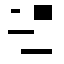

In [22]:
Map_img = Image.open('../dataset/maps/' + Map + '.png').convert('RGB')
Map_img

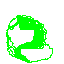

In [23]:
true_roi = Image.open(data_path + data.true_roi[8]).convert('RGB')
true_roi

In [24]:
dataset_path1 = '../dataset/sagan_results/sagan_self_attention/'
dataset_path2= '../dataset/sagan_results/sagan_cbam_attention/'

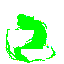

In [25]:
pred_roi1 = Image.open(dataset_path1 + data.pred_roi[8]).convert('RGB')
pred_roi1

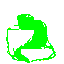

In [26]:
pred_roi2 = Image.open(dataset_path2 + data.pred_roi[8]).convert('RGB')
pred_roi2

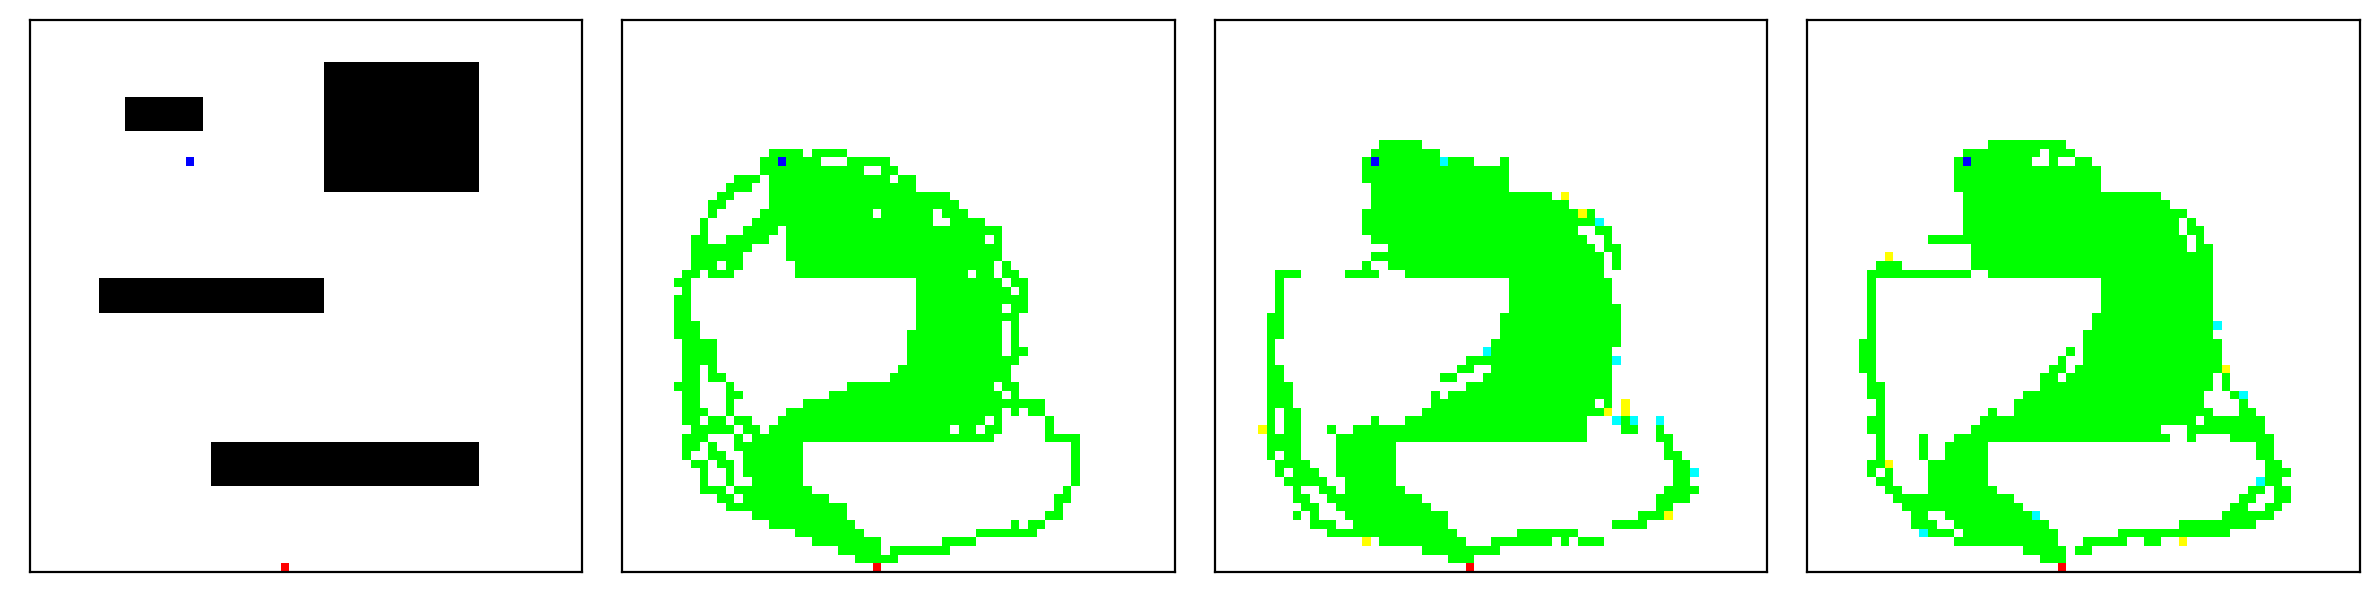

In [27]:
fig, ax = plt.subplots(ncols=4,  figsize=(12, 10), dpi=200)
for axx, map_img in zip(ax.flatten(), [Map_img, true_roi, pred_roi1, pred_roi2]):
    k = map_img.load()
    k[int(start[1]), int(start[0])] = tuple(colors['start']*255)
    k[int(goal[1]), int(goal[0])] = tuple(colors['goal']*255)
    
    axx.axes.xaxis.set_visible(False)
    axx.axes.yaxis.set_visible(False)
    axx.imshow(map_img);
plt.tight_layout()

In [29]:
pred_roi = Image.open(dataset_path2 + data.pred_roi[0]).convert('RGB')
mask_grid = rgb2binary(np.array(pred_roi))
mask_grid = np.where(np.sum(mask_grid, axis=2) > 2, 0, 1)

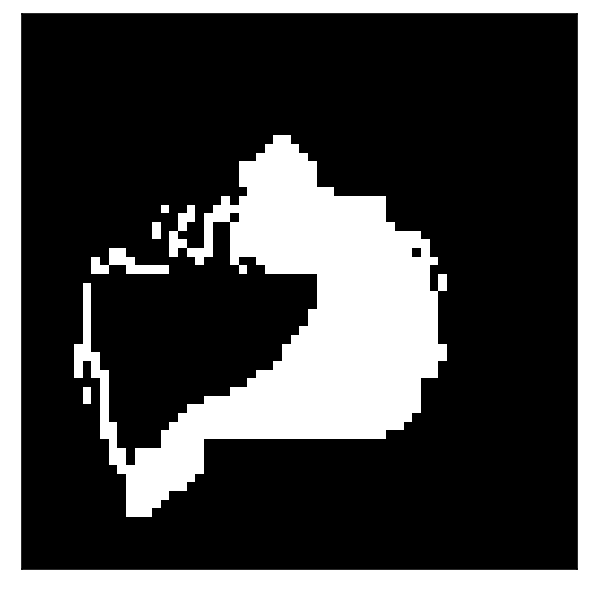

In [34]:
fig, ax = plt.subplots(dpi=150)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(mask_grid, cmap='gray');